# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [105]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans
matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [48]:
### Здесь требуется загрузить датасет phones.csv ###

In [19]:
# загружаем данные
phones = pd.read_csv("1.8_phones.csv")

In [20]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

In [21]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


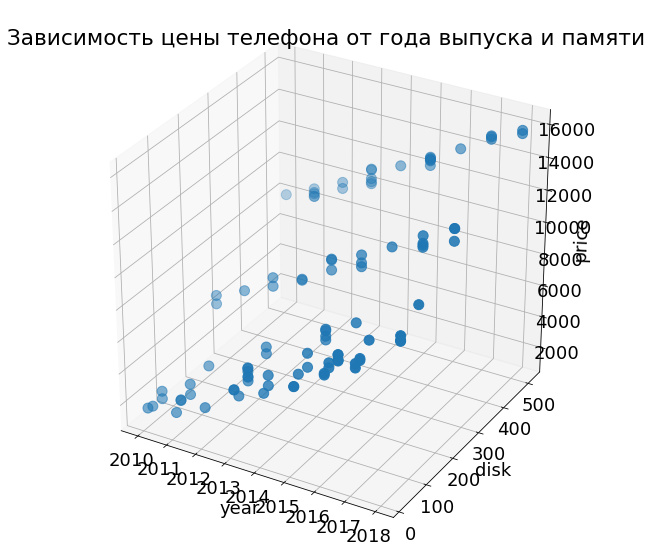

In [71]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d")
# помещаем точки на график
ax.scatter(phones["year"],phones['disk'], phones["price"], s=100)
# отображаем картинку

# называем оси
ax.set_xlabel("year")
ax.set_ylabel("disk")
ax.set_zlabel("price")

ax.set_title('Зависимость цены телефона от года выпуска и памяти')
plt.show()

Задание 1: обучить модель регрессии

In [73]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['year','disk']
y = phones['price']

In [74]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [75]:
# создаем регрессор
reg = LinearRegression().fit(X, y)
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

7848.046694419114

Задание 2: обучить модель классификации

In [83]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['os']
# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [84]:
# выведем информацию для интерпретации построенной модели
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [85]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [103]:
# проведем классификацию
cl.predict(X[3:5])[0], y[3]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

In [113]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk','price']]

In [114]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [125]:
# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

In [126]:
# смотрим центры кластеров
[c1, c2,c3] = clust.cluster_centers_

In [127]:
clust.cluster_centers_

array([[  212.17391304,  8323.32608696],
       [  410.66666667, 12896.83333333],
       [   70.4       ,  3958.53333333]])

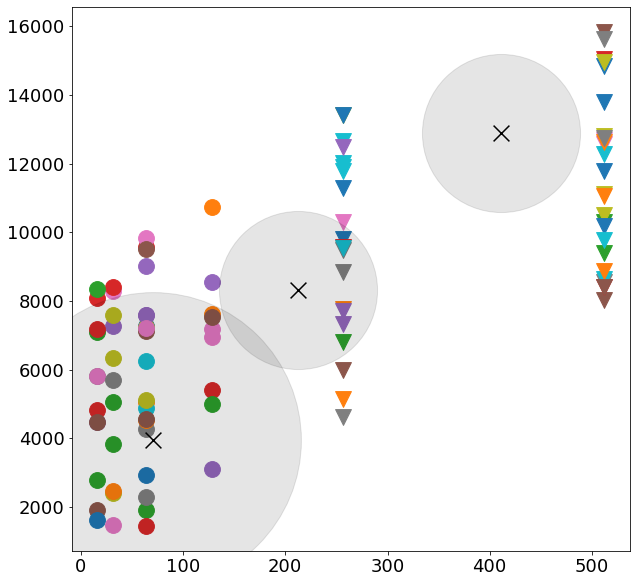

In [130]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.price,phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)
plt.show()

In [131]:
# видно что кластеризация показывает 2 группы IOS и Android устройства 